# TiTanic - Machine Learning Disaster
The goal of the model is to predict who that will be survived based on data that has been provided





### Load the Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




### Data Eksploration
we exploring the data for the fist step, eksploring all that we can ekslpore to understand about the data that we have

In [3]:

#Explore the pattern of the data by a gender, how much wonen that survived and how much male that survived

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [5]:
#Knowing if the data has been duplicated or not is really important
train_data.duplicated().sum()

0

In [6]:
#find out how many items or data are null from train_data set
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
##find out how many items or data are null from test_data set
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#It's will describe any statistic information each column
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
#Mengkelompokan data yang bersifat kategori
data_var = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Cabin', 'Embarked']]

In [14]:
data_var

,Survived,Pclass,Sex,Age,Parch,Cabin,Embarked
0,0,3,male,22.0,0,NaN,S
1,1,1,female,38.0,0,C85,C
2,1,3,female,26.0,0,NaN,S
3,1,1,female,35.0,0,C123,S
4,0,3,male,35.0,0,NaN,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,NaN,S
887,1,1,female,19.0,0,B42,S
888,0,3,female,NaN,2,NaN,S
889,1,1,male,26.0,0,C148,C


In [15]:
#Mengetahui nilai kategori dari tiap variabel
for i in data_var.columns:
  print(data_var[i].unique())

[0 1]
[3 1 2]
['male' 'female']
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[0 1 2 5 3 4 6]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C12

In [16]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in data_var.columns:
  print(data_var[i].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


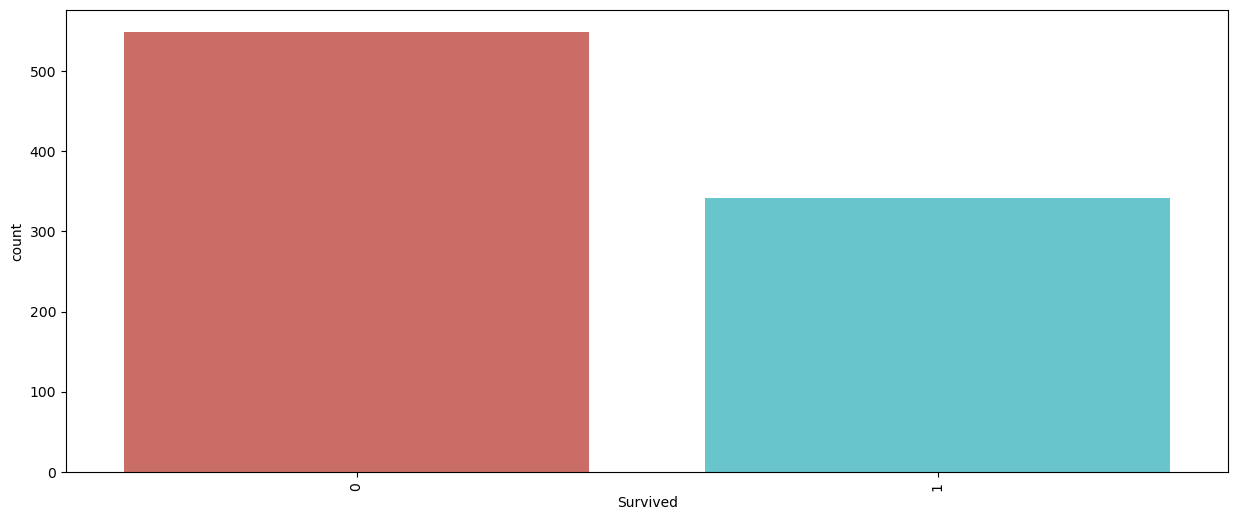

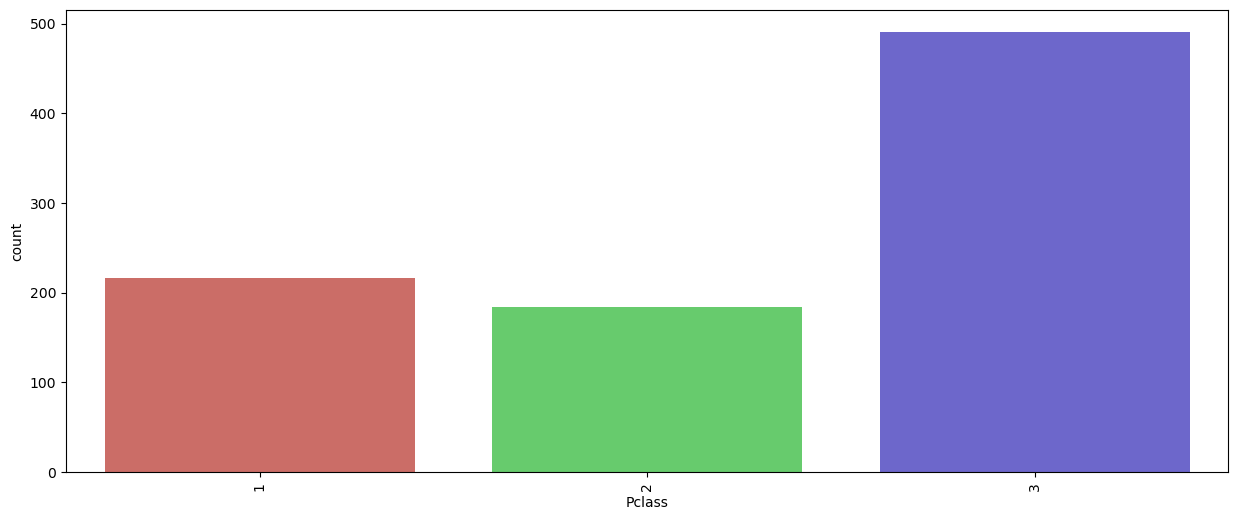

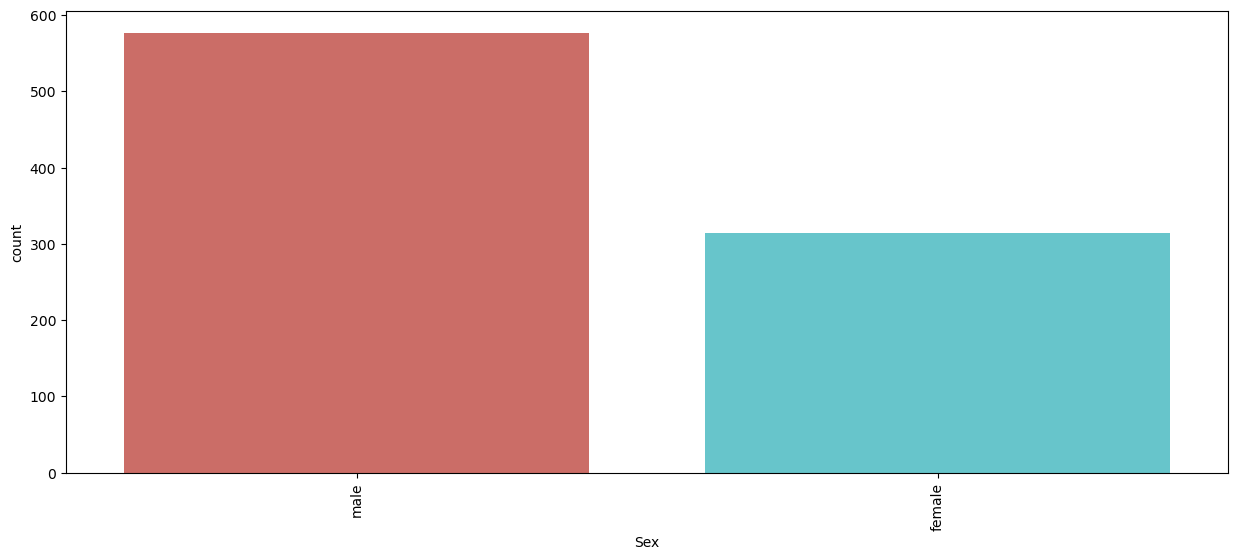

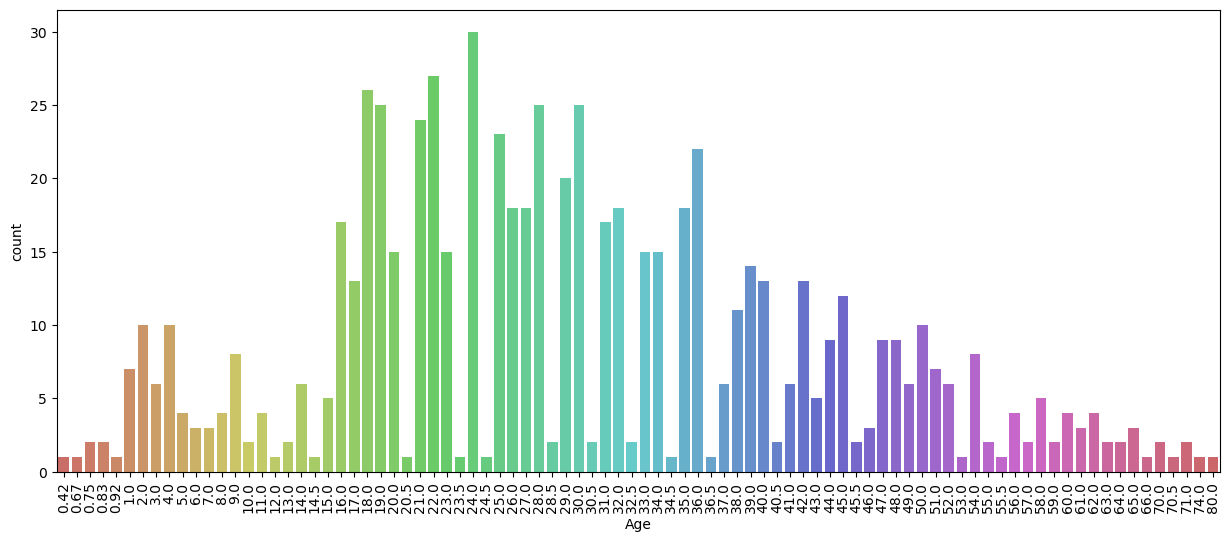

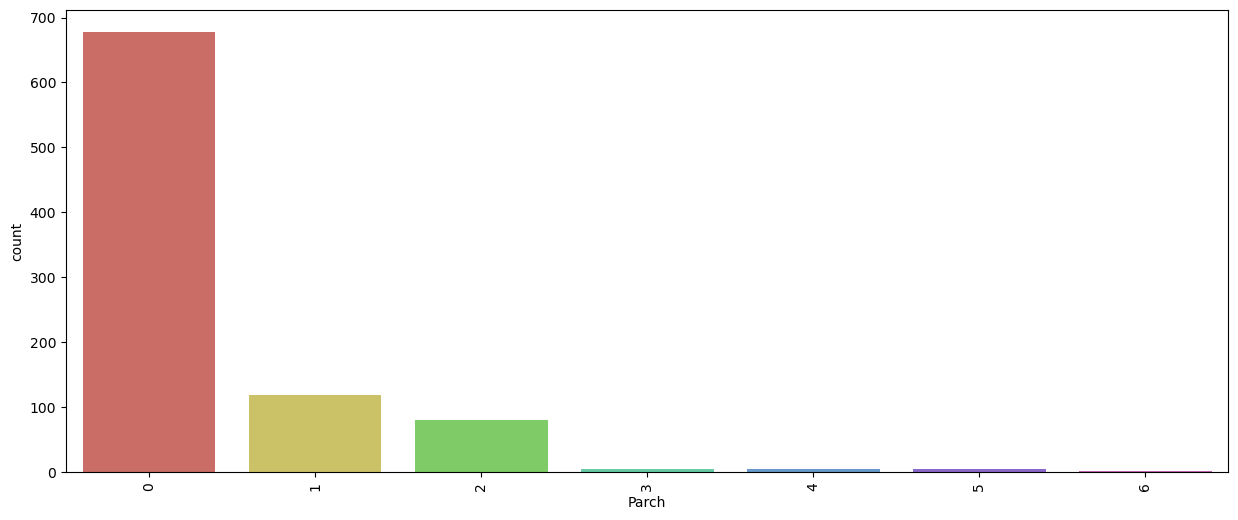

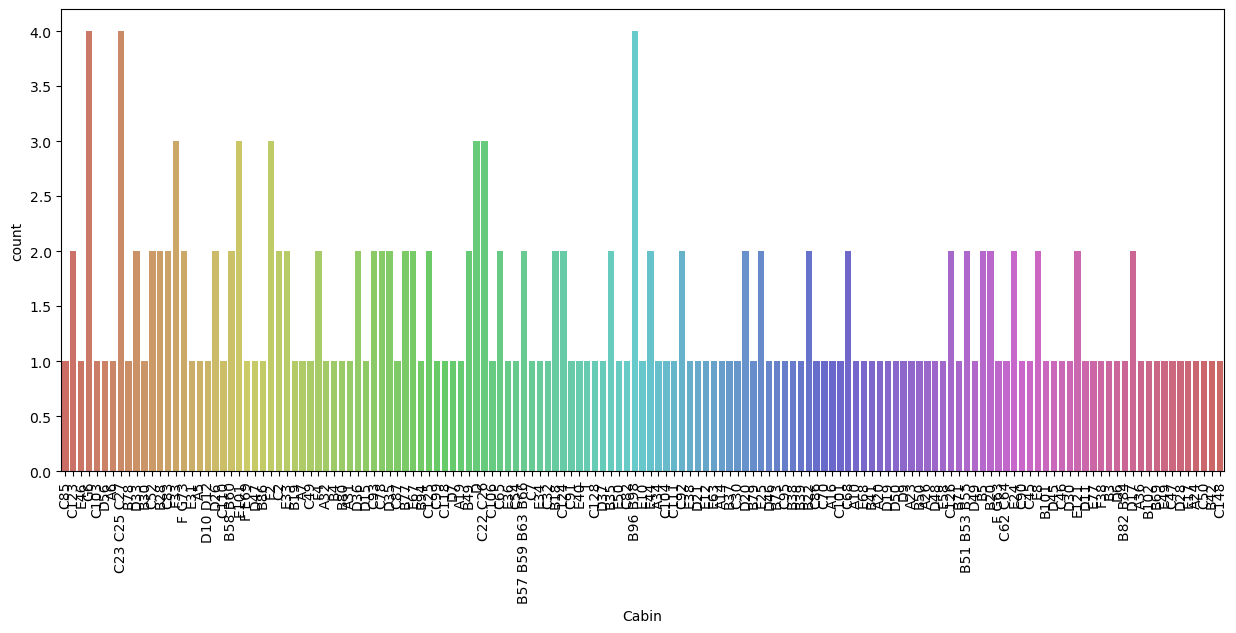

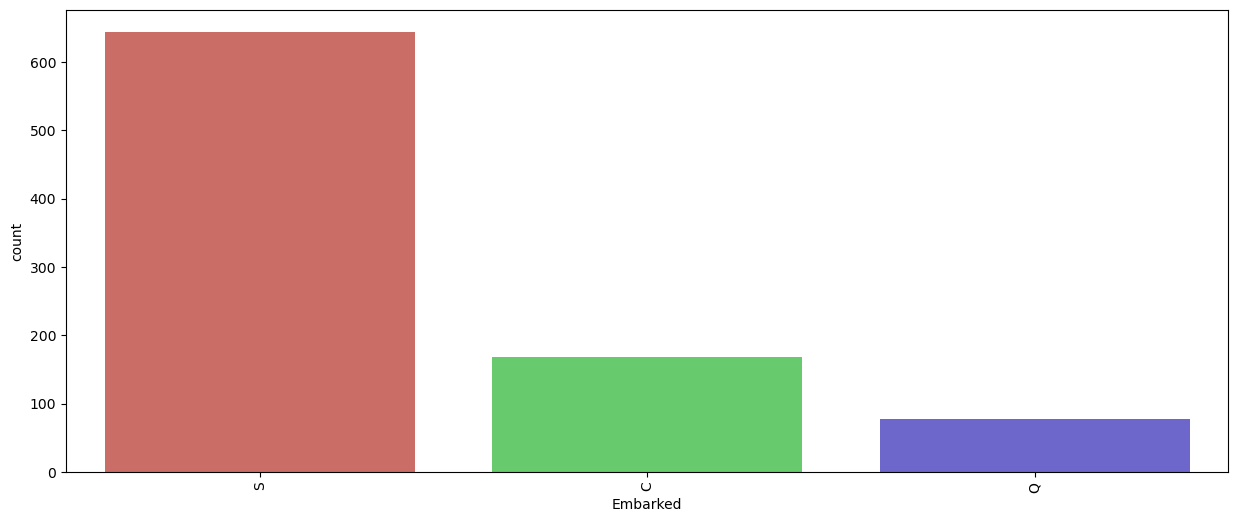

In [18]:
for i in data_var.columns:
  plt.figure(figsize = (15,6))
  sns.countplot(data_var[i],data=data_var,palette='hls')
  plt.xticks(rotation = 90)
  plt.show()

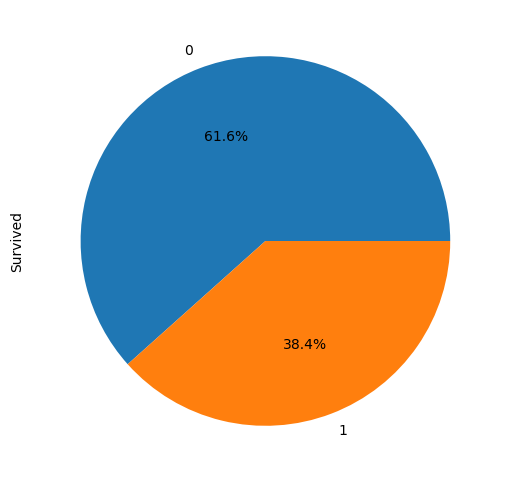

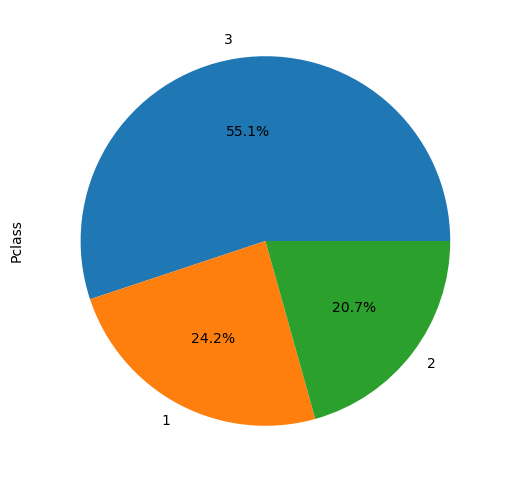

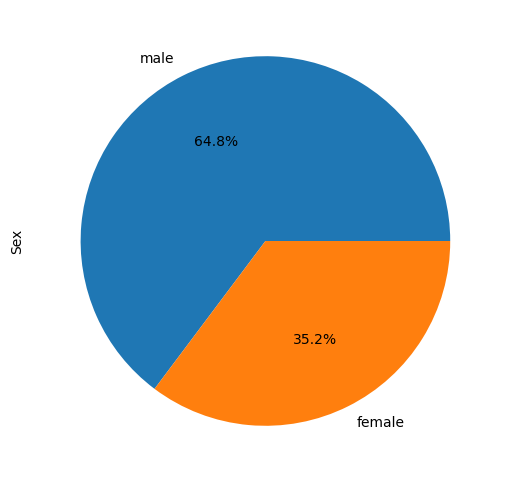

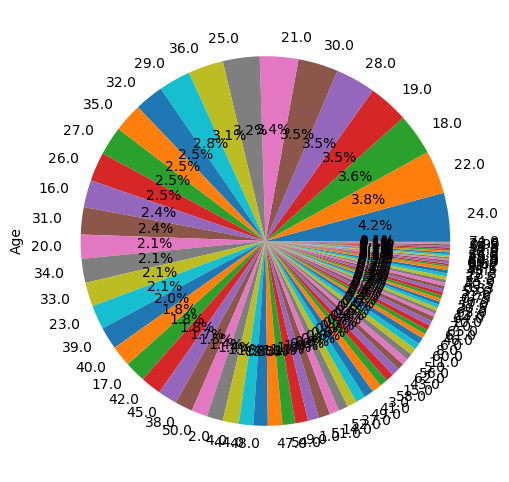

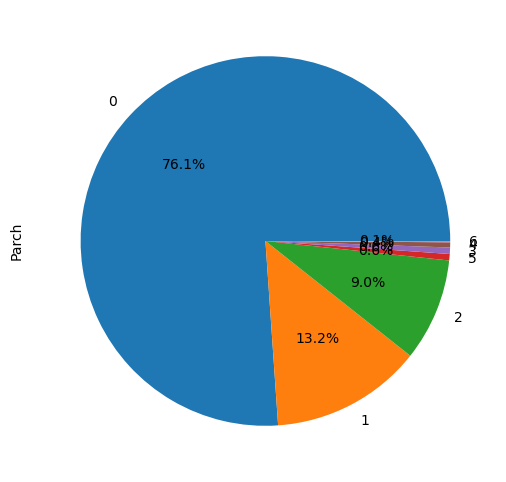

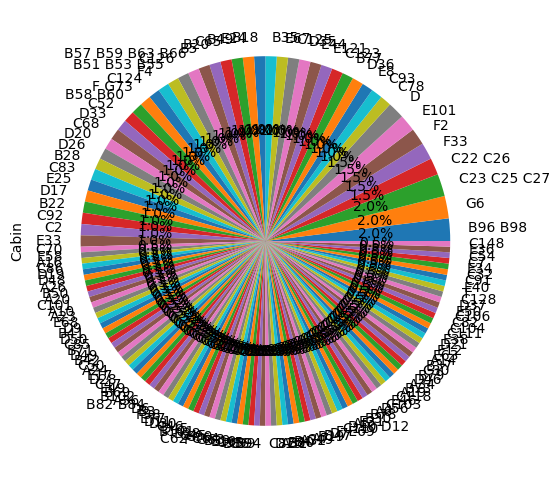

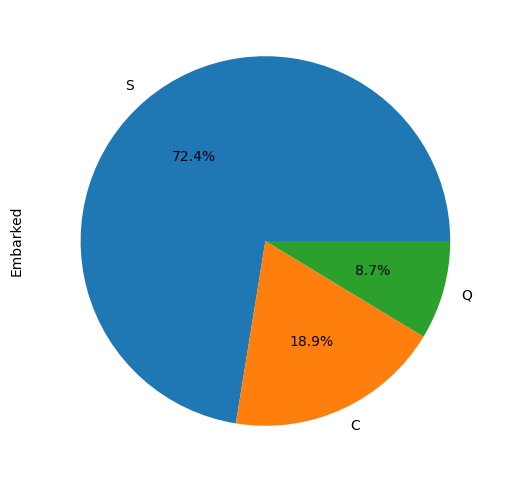

In [19]:
for i in data_var.columns:
  plt.figure(figsize=(15,6))
  data_var[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

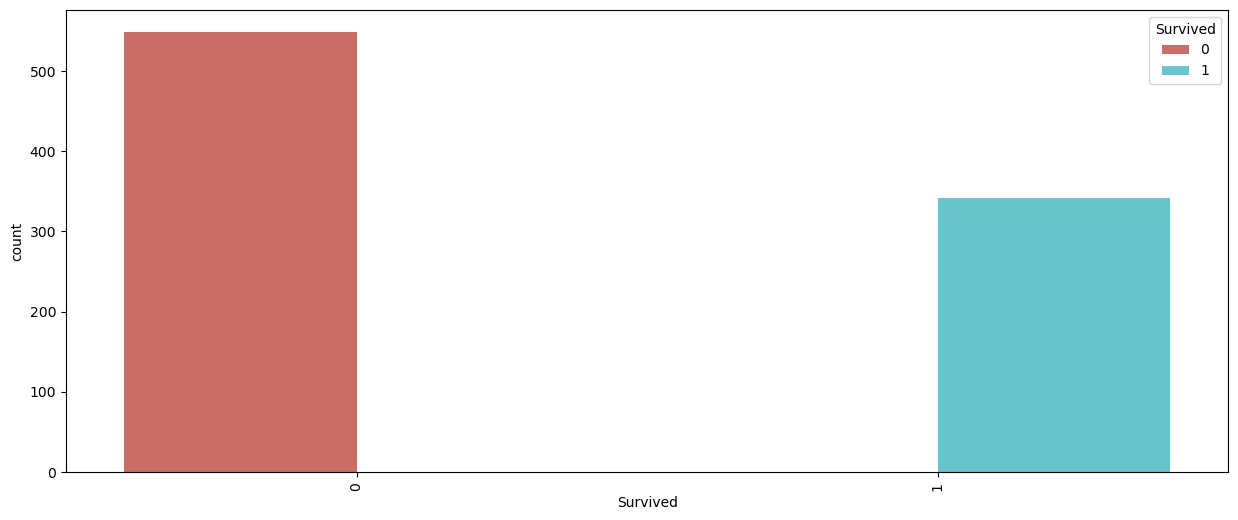

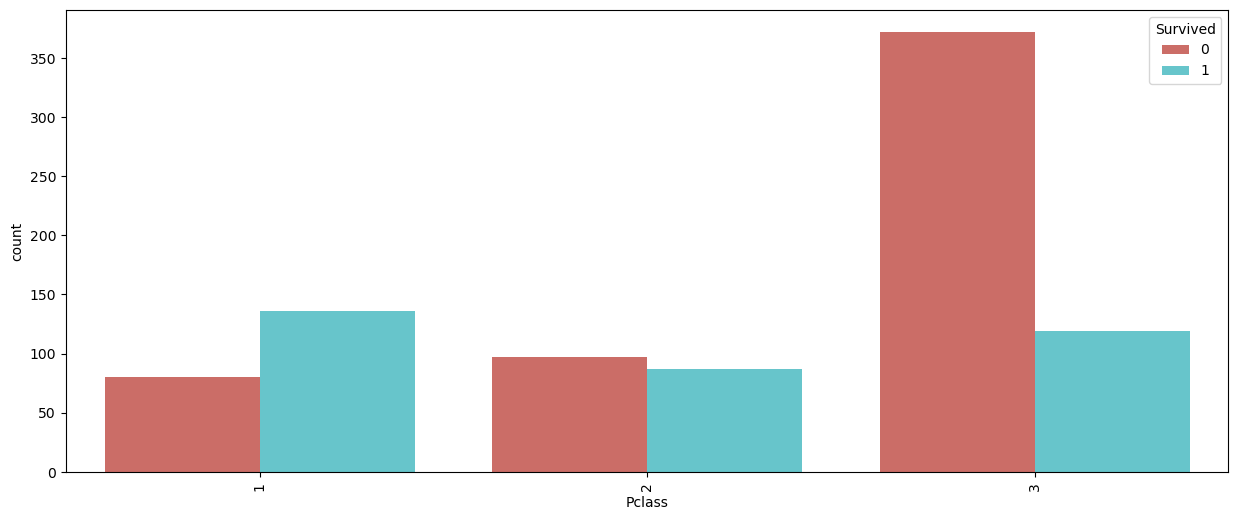

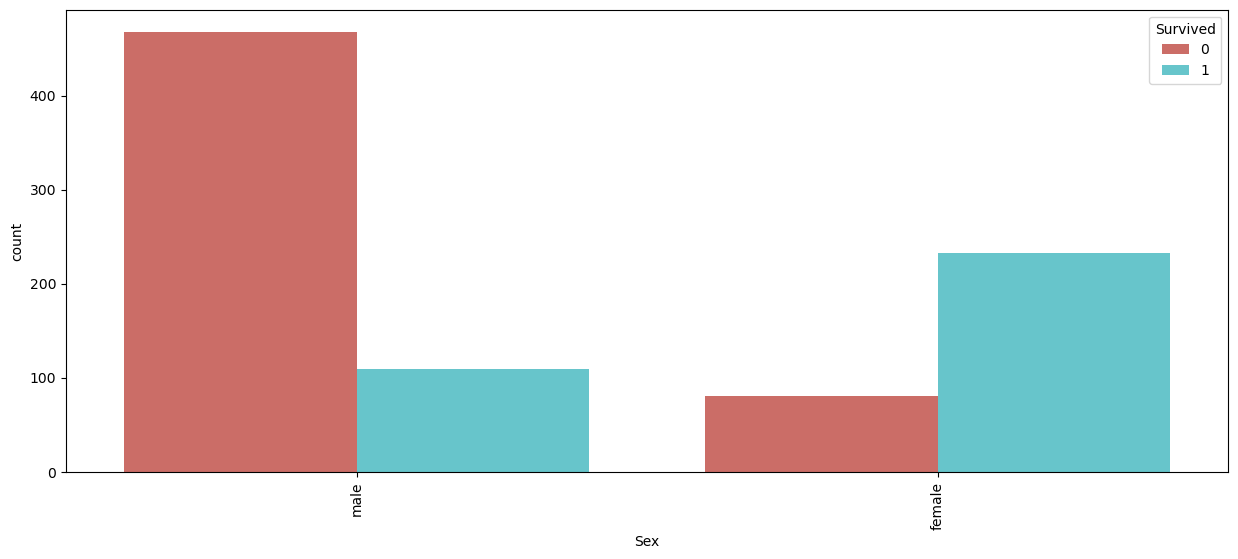

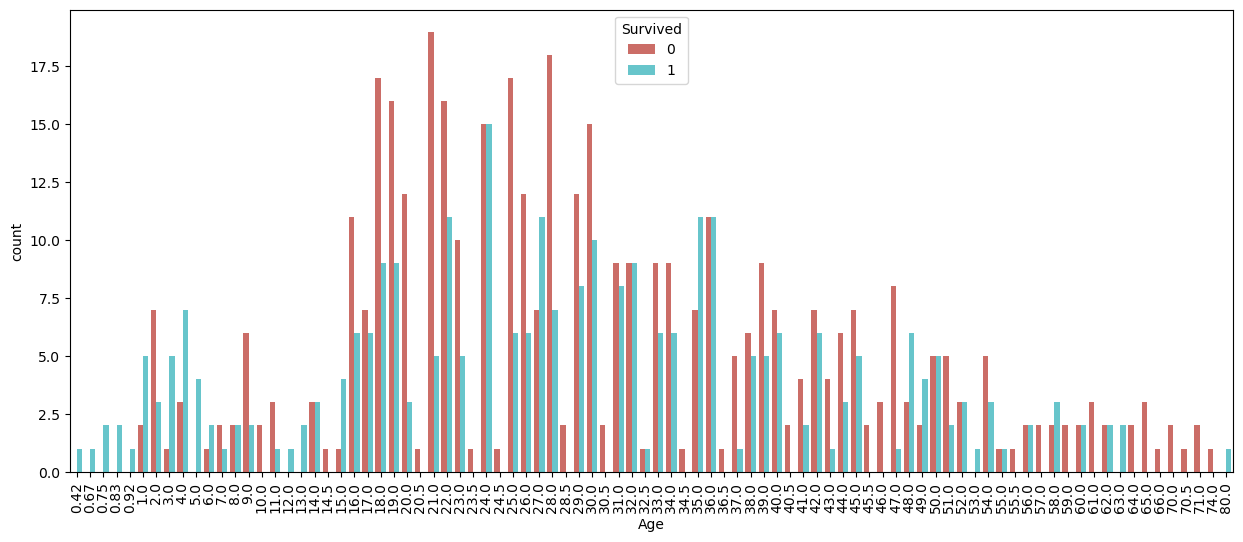

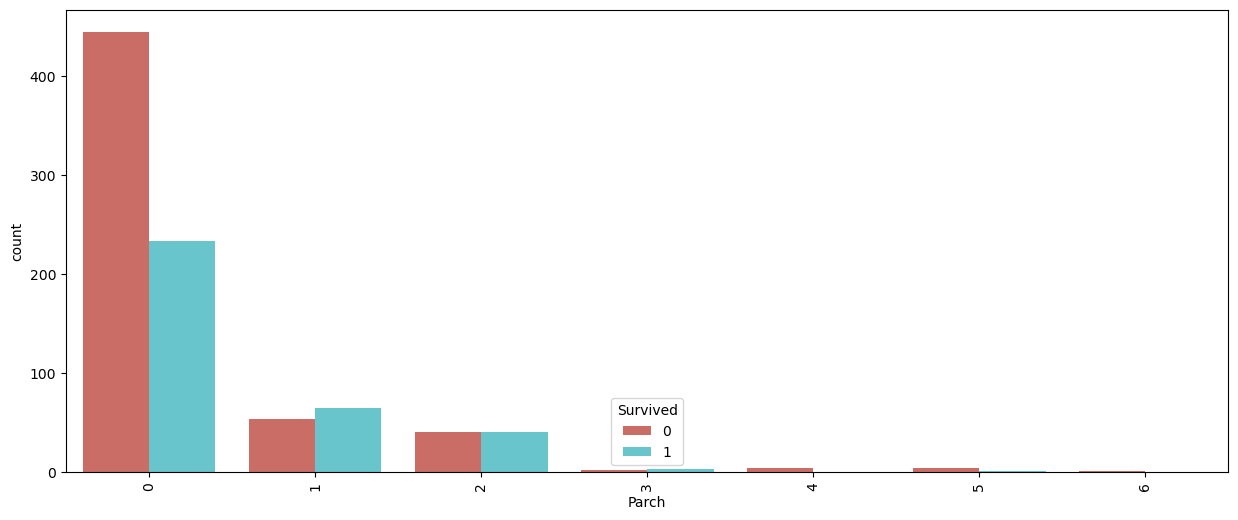

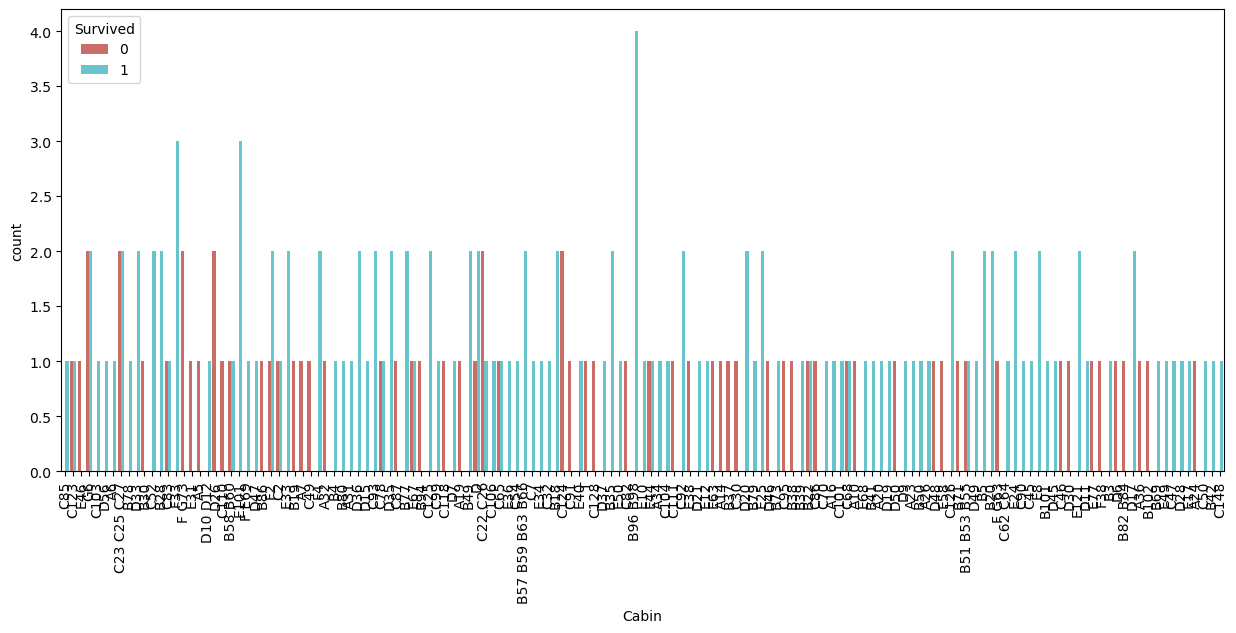

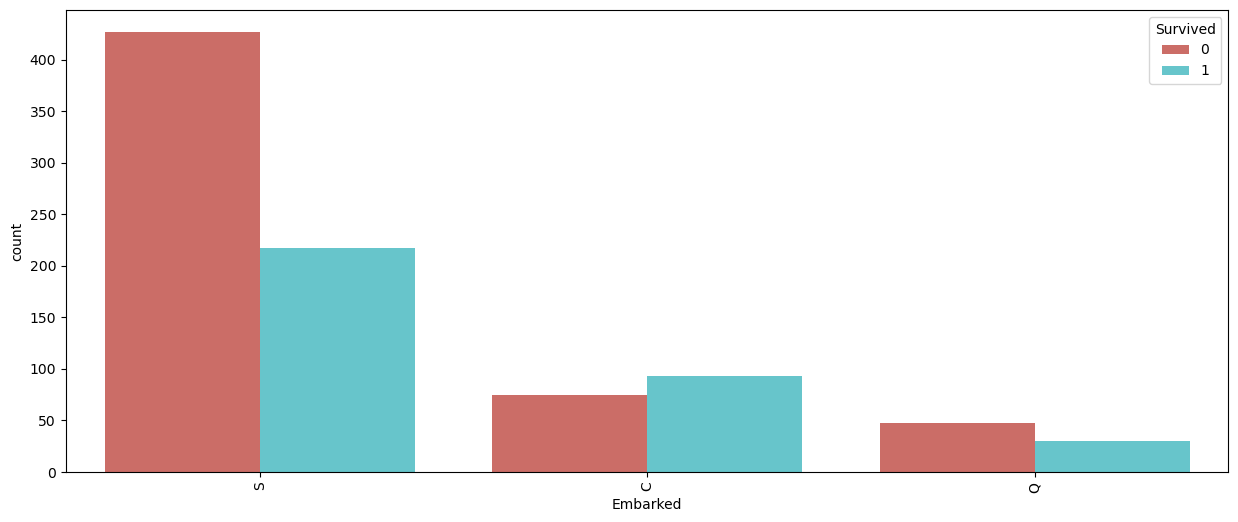

In [21]:
#Visualisasi data kategori

for i in data_var.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(data_var[i], data = data_var, hue='Survived', palette='hls')
  plt.xticks(rotation=90)
  plt.show()

from the data visualization above we can conclude that
1. more unsaved than survivors
2. woman more survived than male
3. PClass 3 more not survived comparing the other pclass
4. etc

# Machine Learning Modeling

In [70]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]

#Random Forrest

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=1)
model.fit(X, y)




RandomForestClassifier(max_depth=10, n_estimators=10, random_state=1)

In [71]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
predictions = model.predict(X_test)

In [72]:
print('Training-set accuracy score:', model.score(X, y))

Training-set accuracy score: 0.8170594837261503


In [ ]:
#Balancing Data

In [90]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X, y)

In [91]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, criterion="entropy")
model2.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [92]:
#Proporsi kelas 1 (Survived=yes) setelah diSMOTE
y_SMOTE.sum()/y_SMOTE.count()

0.5

In [95]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = model2.predict(X)
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', model2.score(X_SMOTE, y_SMOTE))

Training-set accuracy score: 0.8051001821493625


In [94]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_SMOTE, y_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [96]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier.score(X_SMOTE, y_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', ABclassifier.score(X, y))

Training-set accuracy score: 0.7777777777777778
Training-set accuracy score: 0.7710437710437711


In [97]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Random Forrest memiliki akurasi yang jauh lebih besar dibanding model yang lain, hal ini dikarenakan random forrest memang sangat cocok untuk memodelkan klasifikasi berdasarkan polling parameter yang ada